In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Creating a Simple Dataset

In [2]:
x = np.linspace(-2,2, 100)
def f(x):
  return x * 2.0 + 5.0
y = f(x)
print(x)
print(y)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

In [3]:
initial_w = 3.0
initial_b = 4.0

In [4]:
type(x)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

In [6]:
class Model(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # In practice, these should be randomly initialized
    self.w = tf.Variable(initial_w)
    self.b = tf.Variable(initial_b)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

Defining the loss function: Mean Squared Error

In [7]:
def loss(predicted_y, actual_y):
  return tf.reduce_mean(tf.square(predicted_y - actual_y))

Function for Plotting 

In [8]:
def plot_data(inputs, outputs, pred_outputs):
  actual = plt.scatter(inputs, outputs, c='blue',label = 'Actual Data')
  predicted = plt.scatter(inputs, pred_outputs, c='red', label = 'Predicted Data')
  plt.legend(loc='best')
  plt.show()


In [9]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
type(x)

tensorflow.python.framework.ops.EagerTensor

In [10]:
y = tf.convert_to_tensor(y, dtype=tf.float32)
type(y)

tensorflow.python.framework.ops.EagerTensor

In [11]:
model(x)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-2.        , -1.878788  , -1.757576  , -1.6363635 , -1.5151515 ,
       -1.3939395 , -1.272727  , -1.151515  , -1.030303  , -0.909091  ,
       -0.7878785 , -0.666667  , -0.5454545 , -0.42424202, -0.3030305 ,
       -0.18181801, -0.060606  ,  0.060606  ,  0.18181825,  0.30303   ,
        0.4242425 ,  0.5454545 ,  0.6666665 ,  0.78787875,  0.909091  ,
        1.030303  ,  1.151515  ,  1.2727273 ,  1.3939395 ,  1.5151515 ,
        1.6363635 ,  1.7575758 ,  1.878788  ,  2.        ,  2.1212122 ,
        2.2424242 ,  2.3636363 ,  2.4848485 ,  2.6060605 ,  2.7272727 ,
        2.848485  ,  2.969697  ,  3.090909  ,  3.2121212 ,  3.3333333 ,
        3.4545455 ,  3.5757575 ,  3.6969697 ,  3.8181818 ,  3.939394  ,
        4.060606  ,  4.181818  ,  4.3030305 ,  4.4242425 ,  4.5454545 ,
        4.6666665 ,  4.787879  ,  4.909091  ,  5.030303  ,  5.151515  ,
        5.272727  ,  5.3939395 ,  5.5151515 ,  5.636364  ,  5.757576  ,
        5.878788

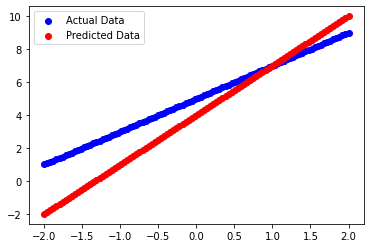

In [12]:
plot_data(x,y,model(x))

**Initial Loss**: Loss calculated on applying initialized values

In [13]:
loss(model(x),y)

<tf.Tensor: shape=(), dtype=float32, numpy=2.3602693>

This is what is to be minimized.

Initial Weights:

In [14]:
print(model.w.numpy(), model.b.numpy())

3.0 4.0


Defining the training loop

In [15]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs),outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss;

In [16]:
model = Model()

list_w = []
list_b = []
losses = []
for epoch in range(25):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x, y, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch,model.w.numpy(),model.b.numpy(),current_loss))


Epoch  0: w=2.73 b=4.20, loss=2.36027
Epoch  1: w=2.53 b=4.36, loss=1.36081
Epoch  2: w=2.39 b=4.49, loss=0.79156
Epoch  3: w=2.28 b=4.59, loss=0.46455
Epoch  4: w=2.20 b=4.67, loss=0.27503
Epoch  5: w=2.15 b=4.74, loss=0.16421
Epoch  6: w=2.11 b=4.79, loss=0.09884
Epoch  7: w=2.08 b=4.83, loss=0.05994
Epoch  8: w=2.06 b=4.87, loss=0.03660
Epoch  9: w=2.04 b=4.89, loss=0.02250
Epoch 10: w=2.03 b=4.91, loss=0.01390
Epoch 11: w=2.02 b=4.93, loss=0.00864
Epoch 12: w=2.02 b=4.95, loss=0.00539
Epoch 13: w=2.01 b=4.96, loss=0.00338
Epoch 14: w=2.01 b=4.96, loss=0.00212
Epoch 15: w=2.01 b=4.97, loss=0.00134
Epoch 16: w=2.00 b=4.98, loss=0.00084
Epoch 17: w=2.00 b=4.98, loss=0.00053
Epoch 18: w=2.00 b=4.99, loss=0.00034
Epoch 19: w=2.00 b=4.99, loss=0.00022
Epoch 20: w=2.00 b=4.99, loss=0.00014
Epoch 21: w=2.00 b=4.99, loss=0.00009
Epoch 22: w=2.00 b=4.99, loss=0.00006
Epoch 23: w=2.00 b=5.00, loss=0.00004
Epoch 24: w=2.00 b=5.00, loss=0.00002


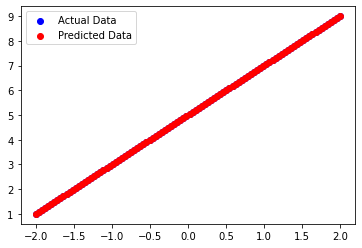

In [17]:
plot_data(x,y,model(x))

For a big range of X

In [18]:
x = np.linspace(5,200, 100)
def f(x):
  return x * 2.0 + 5.0
y = f(x)
print(x)
print(y)

[  5.           6.96969697   8.93939394  10.90909091  12.87878788
  14.84848485  16.81818182  18.78787879  20.75757576  22.72727273
  24.6969697   26.66666667  28.63636364  30.60606061  32.57575758
  34.54545455  36.51515152  38.48484848  40.45454545  42.42424242
  44.39393939  46.36363636  48.33333333  50.3030303   52.27272727
  54.24242424  56.21212121  58.18181818  60.15151515  62.12121212
  64.09090909  66.06060606  68.03030303  70.          71.96969697
  73.93939394  75.90909091  77.87878788  79.84848485  81.81818182
  83.78787879  85.75757576  87.72727273  89.6969697   91.66666667
  93.63636364  95.60606061  97.57575758  99.54545455 101.51515152
 103.48484848 105.45454545 107.42424242 109.39393939 111.36363636
 113.33333333 115.3030303  117.27272727 119.24242424 121.21212121
 123.18181818 125.15151515 127.12121212 129.09090909 131.06060606
 133.03030303 135.         136.96969697 138.93939394 140.90909091
 142.87878788 144.84848485 146.81818182 148.78787879 150.75757576
 152.72727

In [19]:
( ( np.min(x), np.max(x) ) , ( np.min(y), np.max(y) ) )

((5.0, 200.0), (15.0, 405.0))

In [20]:
model = Model()

list_w = []
list_b = []
losses = []
for epoch in range(20):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x, y, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch,model.w.numpy(),model.b.numpy(),current_loss))


Epoch  0: w=-2724.30 b=-16.30, loss=13535.01465
Epoch  1: w=7489056.50 b=55877.18, loss=102130294784.00000
Epoch  2: w=-20572102656.00 b=-153480928.00, loss=770651410759942144.00000
Epoch  3: w=56510658904064.00 b=421605310464.00, loss=5815155060560712871968768.00000
Epoch  4: w=-155232315784560640.00 b=-1158131220480000.00, loss=43879805025862058590822910132224.00000
Epoch  5: w=426416329027529736192.00 b=3181336289655914496.00, loss=inf
Epoch  6: w=-1171346847575127263019008.00 b=-8738989630732755795968.00, loss=inf
Epoch  7: w=3217638120021975408566075392.00 b=24005617365932713080520704.00, loss=inf
Epoch  8: w=-8838710541624672968403541032960.00 b=-65942379432887432360107180032.00, loss=inf
Epoch  9: w=24279549630658820519879137124417536.00 b=181140821878721829196009335422976.00, loss=inf
Epoch 10: w=-inf b=-497585859119267231184063719165394944.00, loss=inf
Epoch 11: w=nan b=inf, loss=inf
Epoch 12: w=nan b=nan, loss=nan
Epoch 13: w=nan b=nan, loss=nan
Epoch 14: w=nan b=nan, loss=na

Hence, we need to scale the data.

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_x = MinMaxScaler()
scl_x = scaler_x.fit_transform(x.reshape(-1, 1))

scaler_y = MinMaxScaler()
scl_y = scaler_y.fit_transform(y.reshape(-1, 1))

print(scl_x[:5])
print(scl_y[:5])

[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]]
[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]]


In [22]:
model = Model()

list_w = []
list_b = []
losses = []
for epoch in range(1000):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, scl_x, scl_y, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch,model.w.numpy(),model.b.numpy(),current_loss))


Epoch  0: w=2.47 b=3.00, loss=25.34007
Epoch  1: w=2.07 b=2.25, loss=14.11798
Epoch  2: w=1.77 b=1.70, loss=7.86588
Epoch  3: w=1.55 b=1.28, loss=4.38269
Epoch  4: w=1.38 b=0.97, loss=2.44211
Epoch  5: w=1.26 b=0.74, loss=1.36096
Epoch  6: w=1.17 b=0.56, loss=0.75861
Epoch  7: w=1.10 b=0.43, loss=0.42302
Epoch  8: w=1.05 b=0.34, loss=0.23605
Epoch  9: w=1.02 b=0.26, loss=0.13187
Epoch 10: w=0.99 b=0.21, loss=0.07382
Epoch 11: w=0.97 b=0.17, loss=0.04147
Epoch 12: w=0.95 b=0.14, loss=0.02344
Epoch 13: w=0.94 b=0.12, loss=0.01338
Epoch 14: w=0.94 b=0.10, loss=0.00777
Epoch 15: w=0.93 b=0.08, loss=0.00464
Epoch 16: w=0.93 b=0.07, loss=0.00288
Epoch 17: w=0.92 b=0.07, loss=0.00190
Epoch 18: w=0.92 b=0.06, loss=0.00134
Epoch 19: w=0.92 b=0.06, loss=0.00102
Epoch 20: w=0.92 b=0.05, loss=0.00084
Epoch 21: w=0.92 b=0.05, loss=0.00073
Epoch 22: w=0.92 b=0.05, loss=0.00066
Epoch 23: w=0.92 b=0.05, loss=0.00061
Epoch 24: w=0.92 b=0.05, loss=0.00058
Epoch 25: w=0.92 b=0.04, loss=0.00056
Epoch 26: 

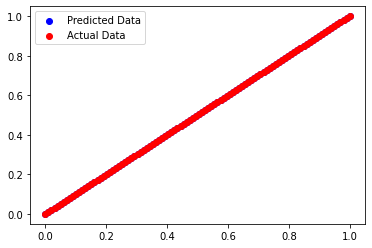

In [23]:
plt.scatter(model(scl_x),scl_y,color='blue',label='Predicted Data')
plt.scatter(scl_x, scl_y, color='red',label='Actual Data')
plt.legend(loc='best')
plt.show()

Model Weights:

In [ ]:
( model.w.numpy(), model.b.numpy() )

(0.99999833, 8.3071774e-07)

Expected:

In [ ]:
2.0 * 6 + 5

17.0

Wrong way to do

In [ ]:
model([6.0])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.999991], dtype=float32)>

To be scaled and then predicted

In [ ]:
x_new = np.array([6.0])
scl_x_new = scaler_x.transform(x_new.reshape(-1, 1))
scl_x_new

array([[0.00512821]])

In [ ]:
y_scl_new = model(scl_x_new)
y_scl_new

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00512903]], dtype=float32)>

For getting into original scale, need to inverse transform

In [ ]:
( scaler_y.data_min_, scaler_y.data_max_ )

(array([15.]), array([405.]))

In [ ]:
y_new = scaler_y.inverse_transform(y_scl_new)
y_new

array([[17.00032078]])

Without scaling y

In [ ]:
model = Model()

list_w = []
list_b = []
losses = []
for epoch in range(1000):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, scl_x, y, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch,model.w.numpy(),model.b.numpy(),current_loss))


Epoch  0: w=23.40 b=44.90, loss=54752.07812
Epoch  1: w=38.34 b=75.58, loss=36509.32422
Epoch  2: w=49.21 b=98.63, loss=26338.44336
Epoch  3: w=57.05 b=115.98, loss=20664.78320
Epoch  4: w=62.63 b=129.08, loss=17496.81836
Epoch  5: w=66.53 b=139.00, loss=15725.02734
Epoch  6: w=69.17 b=146.55, loss=14731.25293
Epoch  7: w=70.88 b=152.32, loss=14171.10840
Epoch  8: w=71.90 b=156.77, loss=13852.72363
Epoch  9: w=72.40 b=160.23, loss=13669.19531
Epoch 10: w=72.53 b=162.94, loss=13560.96289
Epoch 11: w=72.38 b=165.10, loss=13494.83887
Epoch 12: w=72.02 b=166.84, loss=13452.32617
Epoch 13: w=71.51 b=168.27, loss=13423.12598
Epoch 14: w=70.89 b=169.47, loss=13401.48438
Epoch 15: w=70.19 b=170.48, loss=13384.19922
Epoch 16: w=69.44 b=171.37, loss=13369.47852
Epoch 17: w=68.65 b=172.15, loss=13356.32422
Epoch 18: w=67.84 b=172.85, loss=13344.17285
Epoch 19: w=67.01 b=173.50, loss=13332.70996
Epoch 20: w=66.17 b=174.10, loss=13321.75488
Epoch 21: w=65.32 b=174.66, loss=13311.20508
Epoch 22: w=6

To be scaled and then predicted

In [ ]:
x_new = np.array([6.0])
scl_x_new = scaler_x.transform(x_new.reshape(-1, 1))
scl_x_new

array([[0.00512821]])

In [ ]:
y_scl_new = model(scl_x_new)
y_scl_new

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[209.99985]], dtype=float32)>

For getting into original scale, need to inverse transform

In [ ]:
y_new = scaler_y.inverse_transform(y_scl_new)
y_new

array([[81914.94049072]])

## Standard scaling

Hence, we need to scale the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_x = StandardScaler()
scl_x = scaler_x.fit_transform(x.reshape(-1, 1))

scaler_y = StandardScaler()
scl_y = scaler_y.fit_transform(y.reshape(-1, 1))

print(scl_x[:5])
print(scl_y[:5])

[[-1.71481604]
 [-1.68017329]
 [-1.64553055]
 [-1.6108878 ]
 [-1.57624505]]
[[-1.71481604]
 [-1.68017329]
 [-1.64553055]
 [-1.6108878 ]
 [-1.57624505]]


In [ ]:
model = Model()

list_w = []
list_b = []
losses = []
for epoch in range(1000):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, scl_x, scl_y, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch,model.w.numpy(),model.b.numpy(),current_loss))


Epoch  0: w=2.60 b=3.20, loss=20.00000
Epoch  1: w=2.28 b=2.56, loss=12.80000
Epoch  2: w=2.02 b=2.05, loss=8.19200
Epoch  3: w=1.82 b=1.64, loss=5.24288
Epoch  4: w=1.66 b=1.31, loss=3.35544
Epoch  5: w=1.52 b=1.05, loss=2.14748
Epoch  6: w=1.42 b=0.84, loss=1.37439
Epoch  7: w=1.34 b=0.67, loss=0.87961
Epoch  8: w=1.27 b=0.54, loss=0.56295
Epoch  9: w=1.21 b=0.43, loss=0.36029
Epoch 10: w=1.17 b=0.34, loss=0.23058
Epoch 11: w=1.14 b=0.27, loss=0.14757
Epoch 12: w=1.11 b=0.22, loss=0.09445
Epoch 13: w=1.09 b=0.18, loss=0.06045
Epoch 14: w=1.07 b=0.14, loss=0.03869
Epoch 15: w=1.06 b=0.11, loss=0.02476
Epoch 16: w=1.05 b=0.09, loss=0.01585
Epoch 17: w=1.04 b=0.07, loss=0.01014
Epoch 18: w=1.03 b=0.06, loss=0.00649
Epoch 19: w=1.02 b=0.05, loss=0.00415
Epoch 20: w=1.02 b=0.04, loss=0.00266
Epoch 21: w=1.01 b=0.03, loss=0.00170
Epoch 22: w=1.01 b=0.02, loss=0.00109
Epoch 23: w=1.01 b=0.02, loss=0.00070
Epoch 24: w=1.01 b=0.02, loss=0.00045
Epoch 25: w=1.01 b=0.01, loss=0.00029
Epoch 26: 

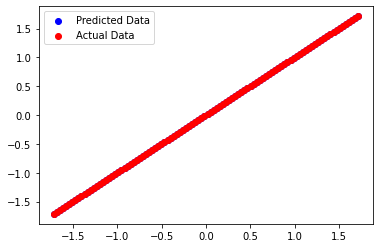

In [ ]:
plt.scatter(model(scl_x),scl_y,color='blue',label='Predicted Data')
plt.scatter(scl_x, scl_y, color='red',label='Actual Data')
plt.legend(loc='best')
plt.show()

Model Weights:

In [ ]:
( model.w.numpy(), model.b.numpy() )

(1.0000002, 9.303518e-10)

Expected:

In [ ]:
2.0 * 6 + 5

17.0

Wrong way to do

In [ ]:
model([6.0])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([6.0000014], dtype=float32)>

To be scaled and then predicted

In [ ]:
x_new = np.array([6.0])
scl_x_new = scaler_x.transform(x_new.reshape(-1, 1))
scl_x_new

array([[-1.69722819]])

In [ ]:
y_scl_new = model(scl_x_new)
y_scl_new

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.6972286]], dtype=float32)>

For getting into original scale, need to inverse transform

In [ ]:
( scaler_y.mean_, scaler_y.scale_ )

(array([210.]), array([113.7148214]))

In [ ]:
y_new = scaler_y.inverse_transform(y_scl_new)
y_new

array([[16.99995846]])